In [2]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

/tmp/ipykernel_89/4114330600.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


(11431, 1779)

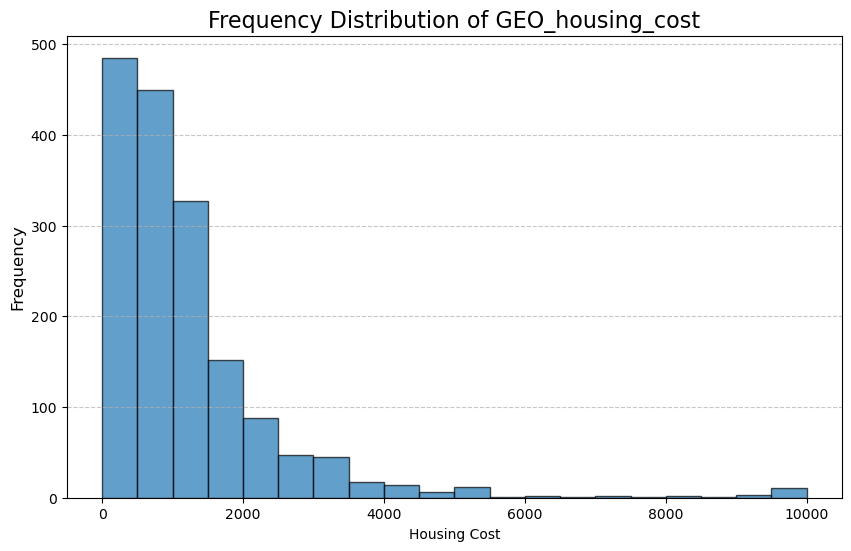

count     1666.000000
mean      1131.053421
std       1306.292255
min          0.000000
25%        400.000000
50%        850.000000
75%       1450.000000
max      10000.000000
Name: GEO_housing_cost, dtype: float64

In [3]:
import matplotlib.pyplot as plt

# 检查 GEO_housing_cost 是否存在并移除缺失值
if 'GEO_housing_cost' in data.columns:
    housing_cost = data['GEO_housing_cost'].dropna()
    
    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.hist(housing_cost, bins=20, edgecolor='k', alpha=0.7)  # bins 控制柱状图的分段
    plt.title('Frequency Distribution of GEO_housing_cost', fontsize=16)
    plt.xlabel('Housing Cost')
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The column 'GEO_housing_cost' does not exist in the DataFrame.")

    
    
data['GEO_housing_cost'].dropna().describe()

Gamma Distribution Fit Evaluation:
Shape (k): 1.599511518425054
Location (loc): 0.5064544024870558
Scale (θ): 2.4570662099901286
MSE (Mean Squared Error): 0.0012685959794760048
KS Test Statistic: 0.05731203835262133, p-value: 0.878850282403011
Log-Likelihood: -231.05161415563686


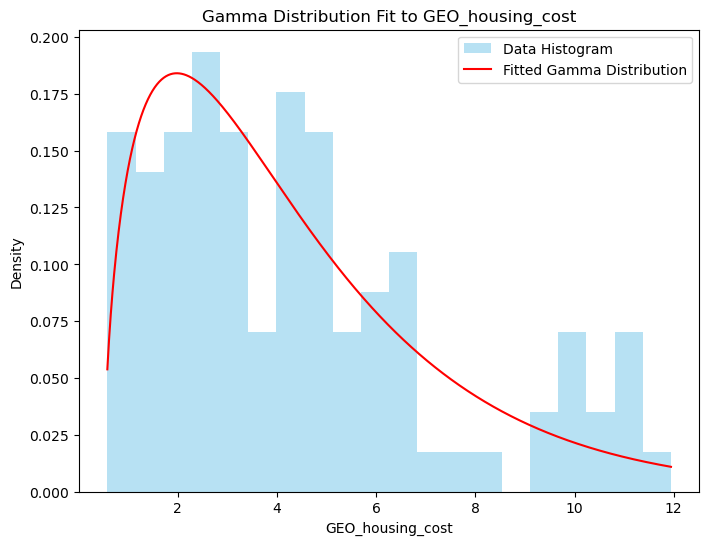

In [4]:
from scipy.stats import gamma, ks_1samp
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 生成示例数据（或使用您的数据）
data = pd.DataFrame({
    'GEO_housing_cost': np.random.gamma(shape=2, scale=2, size=100).tolist() + [np.nan] * 5  # 加入缺失值
})

# 处理缺失值
geo_housing_cost = data['GEO_housing_cost'].dropna()

# 拟合伽马分布
shape, loc, scale = gamma.fit(geo_housing_cost)

# 计算拟合的概率密度函数 (PDF)
x = np.linspace(geo_housing_cost.min(), geo_housing_cost.max(), 1000)
pdf_fitted = gamma.pdf(x, shape, loc, scale)

# 计算实际数据的概率密度（通过直方图）
hist, bin_edges = np.histogram(geo_housing_cost, bins=20, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# 评估指标
# 1. 均方误差 (MSE)
mse = mean_squared_error(hist, gamma.pdf(bin_centers, shape, loc, scale))

# 2. Kolmogorov-Smirnov 检验
ks_stat, ks_p_value = ks_1samp(geo_housing_cost, lambda x: gamma.cdf(x, shape, loc, scale))

# 3. 对数似然估计
log_likelihood = np.sum(gamma.logpdf(geo_housing_cost, shape, loc, scale))

# 打印评估结果
print("Gamma Distribution Fit Evaluation:")
print(f"Shape (k): {shape}")
print(f"Location (loc): {loc}")
print(f"Scale (θ): {scale}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"KS Test Statistic: {ks_stat}, p-value: {ks_p_value}")
print(f"Log-Likelihood: {log_likelihood}")

# 可视化评估
plt.figure(figsize=(8, 6))
plt.hist(geo_housing_cost, bins=20, density=True, alpha=0.6, color='skyblue', label='Data Histogram')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Gamma Distribution')
plt.title('Gamma Distribution Fit to GEO_housing_cost')
plt.xlabel('GEO_housing_cost')
plt.ylabel('Density')
plt.legend()
plt.show()


Gamma Distribution Fit Evaluation on Test Data:
Shape (k): 2.51545897923104
Location (loc): -0.32657159977993166
Scale (θ): 1.8499317172681486
MSE (Mean Squared Error): 0.006772635779285091
KS Test Statistic: 0.16123111533611262, p-value: 0.37604604715189993
Log-Likelihood: -68.10634630586954


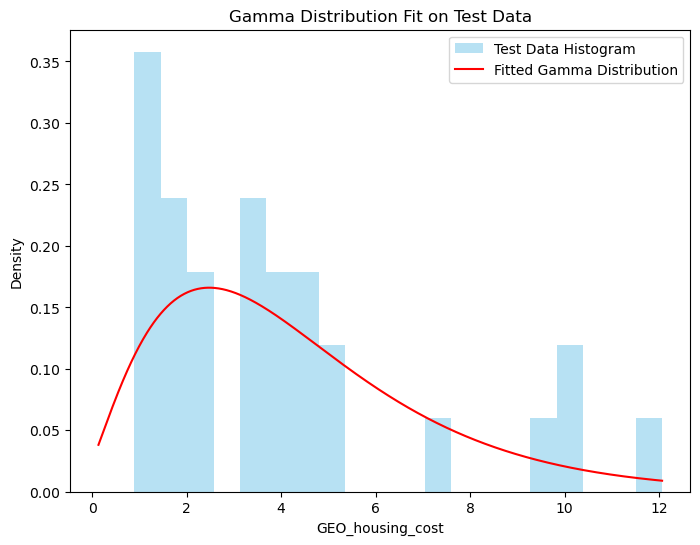

In [5]:
from scipy.stats import gamma, ks_1samp
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 生成示例数据（或使用您的数据）
data = pd.DataFrame({
    'GEO_housing_cost': np.random.gamma(shape=2, scale=2, size=100).tolist() + [np.nan] * 5  # 加入缺失值
})

# 处理缺失值
geo_housing_cost = data['GEO_housing_cost'].dropna()

# 数据拆分为训练集和测试集
train_data, test_data = train_test_split(geo_housing_cost, test_size=0.3, random_state=42)

# 在训练集上拟合伽马分布
shape, loc, scale = gamma.fit(train_data)

# 在测试集上计算性能指标
# 1. 均方误差 (MSE)
hist, bin_edges = np.histogram(test_data, bins=20, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
mse = mean_squared_error(hist, gamma.pdf(bin_centers, shape, loc, scale))

# 2. Kolmogorov-Smirnov 检验
ks_stat, ks_p_value = ks_1samp(test_data, lambda x: gamma.cdf(x, shape, loc, scale))

# 3. 对数似然估计
log_likelihood = np.sum(gamma.logpdf(test_data, shape, loc, scale))

# 打印评估结果
print("Gamma Distribution Fit Evaluation on Test Data:")
print(f"Shape (k): {shape}")
print(f"Location (loc): {loc}")
print(f"Scale (θ): {scale}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"KS Test Statistic: {ks_stat}, p-value: {ks_p_value}")
print(f"Log-Likelihood: {log_likelihood}")

# 可视化训练集和测试集的拟合效果
x = np.linspace(geo_housing_cost.min(), geo_housing_cost.max(), 1000)
pdf_fitted = gamma.pdf(x, shape, loc, scale)

plt.figure(figsize=(8, 6))
plt.hist(test_data, bins=20, density=True, alpha=0.6, color='skyblue', label='Test Data Histogram')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Gamma Distribution')
plt.title('Gamma Distribution Fit on Test Data')
plt.xlabel('GEO_housing_cost')
plt.ylabel('Density')
plt.legend()
plt.show()


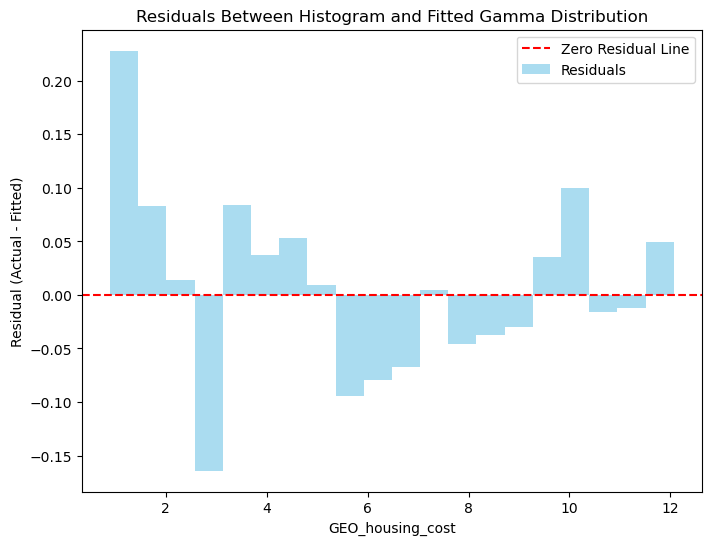

In [6]:
# 计算残差
# 实际密度：直方图密度
residuals = hist - gamma.pdf(bin_centers, shape, loc, scale)

# 绘制残差图
plt.figure(figsize=(8, 6))
plt.bar(bin_centers, residuals, width=(bin_edges[1] - bin_edges[0]), color='skyblue', alpha=0.7, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals Between Histogram and Fitted Gamma Distribution')
plt.xlabel('GEO_housing_cost')
plt.ylabel('Residual (Actual - Fitted)')
plt.legend()
plt.show()


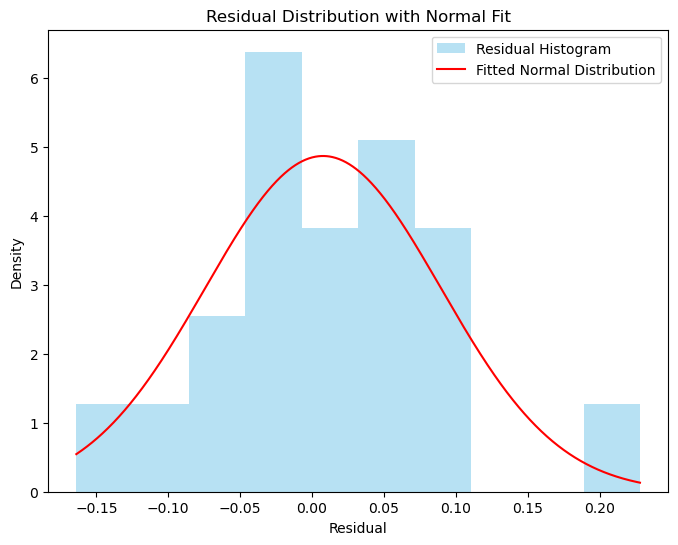

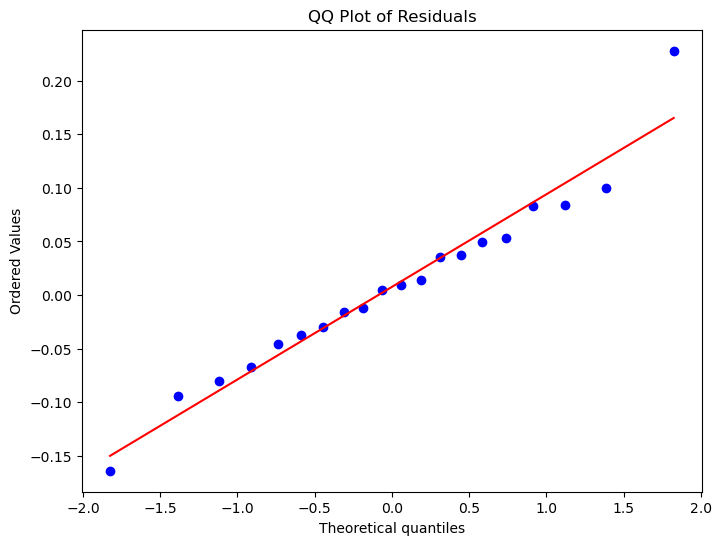

In [7]:
from scipy.stats import norm, probplot

# 计算残差
residuals = hist - gamma.pdf(bin_centers, shape, loc, scale)

# 拟合正态分布到残差
residual_mean, residual_std = norm.fit(residuals)

# 生成正态分布的概率密度函数
x_residuals = np.linspace(residuals.min(), residuals.max(), 1000)
pdf_residuals = norm.pdf(x_residuals, residual_mean, residual_std)

# 绘制残差的分布直方图及拟合的正态分布
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, density=True, alpha=0.6, color='skyblue', label='Residual Histogram')
plt.plot(x_residuals, pdf_residuals, 'r-', label='Fitted Normal Distribution')
plt.title('Residual Distribution with Normal Fit')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.legend()
plt.show()

# QQ 图检验残差是否符合正态分布
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()


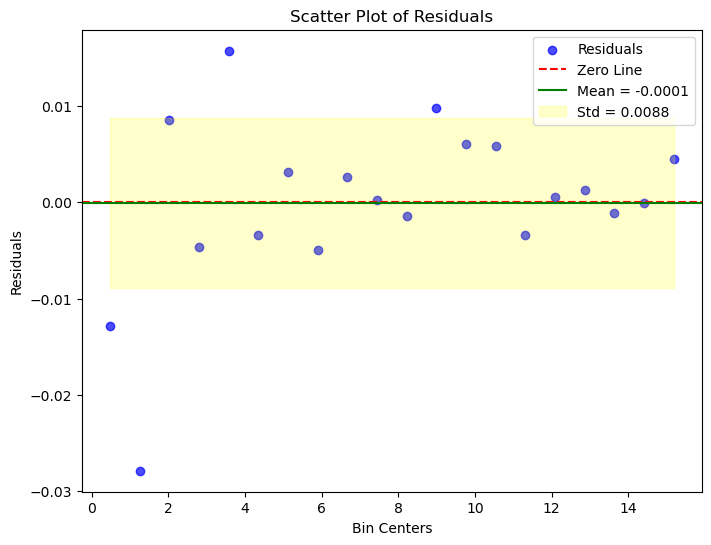

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# 假设你已有 hist 和 bin_centers，以及伽马分布的拟合参数 shape, loc, scale
# hist 和 bin_centers 需要根据数据生成
# 示例数据生成
np.random.seed(42)
data = np.random.gamma(2, 2, 1000)
hist, bin_edges = np.histogram(data, bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 伽马分布拟合参数（假设已知）
shape, loc, scale = 2, 0, 2  # 可替换为实际拟合参数

# 计算残差
residuals = hist - gamma.pdf(bin_centers, shape, loc, scale)

# 绘制残差的散点图
plt.figure(figsize=(8, 6))
plt.scatter(bin_centers, residuals, color='blue', alpha=0.7, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

# 标注均值和标准差
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
plt.axhline(y=residual_mean, color='green', linestyle='-', label=f'Mean = {residual_mean:.4f}')
plt.fill_between(bin_centers, residual_mean - residual_std, residual_mean + residual_std, 
                 color='yellow', alpha=0.2, label=f'Std = {residual_std:.4f}')

# 添加标题和标签
plt.title('Scatter Plot of Residuals')
plt.xlabel('Bin Centers')
plt.ylabel('Residuals')
plt.legend()
plt.show()


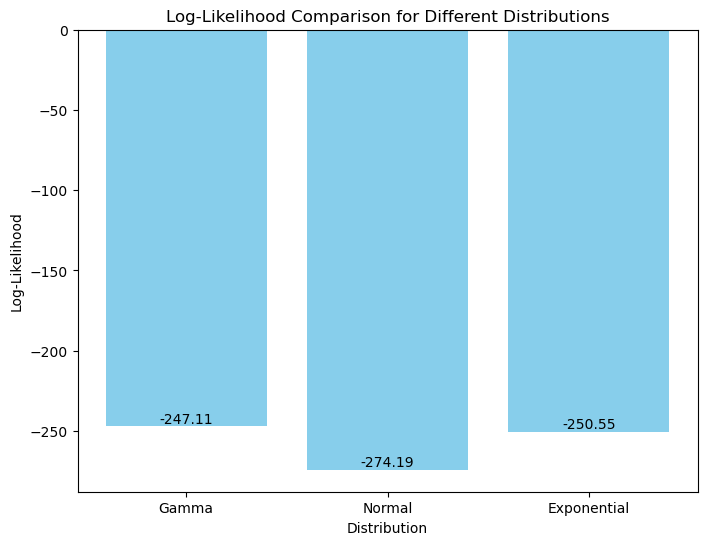

In [7]:
from scipy.stats import gamma, norm, expon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
data = pd.DataFrame({
    'GEO_housing_cost': np.random.gamma(shape=2, scale=2, size=100).tolist() + [np.nan] * 5
})

# 处理缺失值
geo_housing_cost = data['GEO_housing_cost'].dropna()

# 拟合不同分布并计算对数似然
distributions = {
    'Gamma': gamma,
    'Normal': norm,
    'Exponential': expon
}

log_likelihoods = {}

for dist_name, dist in distributions.items():
    # 拟合分布
    params = dist.fit(geo_housing_cost)
    # 计算对数似然
    log_likelihood = np.sum(dist.logpdf(geo_housing_cost, *params))
    log_likelihoods[dist_name] = log_likelihood

# 可视化对比
plt.figure(figsize=(8, 6))
plt.bar(log_likelihoods.keys(), log_likelihoods.values(), color='skyblue')
plt.title('Log-Likelihood Comparison for Different Distributions')
plt.ylabel('Log-Likelihood')
plt.xlabel('Distribution')
for i, v in enumerate(log_likelihoods.values()):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()
